Error opening serial port: could not open port 'COM5': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)
            timestamp    x     y     z
0 2024-07-24 14:07:12 -0.0 -0.03  1.01
1 2024-07-24 14:07:13 -0.0 -0.03  1.01
2 2024-07-24 14:07:14 -0.0 -0.03  1.01
3 2024-07-24 14:07:15 -0.0 -0.03  1.01
4 2024-07-24 14:07:16 -0.0 -0.03  1.01


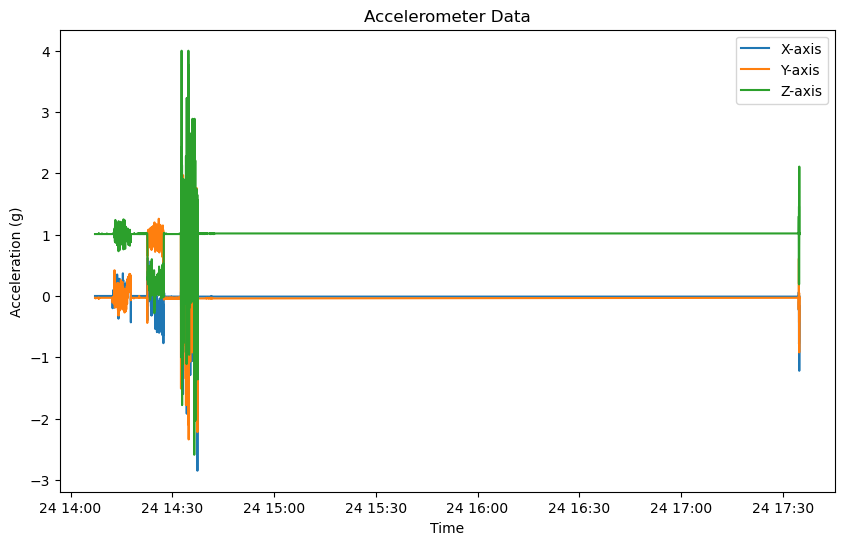

In [14]:
import serial
import time
import csv
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Establish serial connection (adjust 'COM5' to your Arduino's port)
try:
    ser = serial.Serial('COM5', 9600)  # Replace 'COM5' with your actual port
    print("Serial port opened successfully.")
except Exception as e:
    print(f"Error opening serial port: {e}")
    ser = None

if ser:
    # Open CSV file to write data
    with open('accelerometer_data.csv', mode='a', newline='') as file:
        writer = csv.writer(file)
        
        # Continuously read data from Arduino
        try:
            print("Starting data collection...")
            while True:
                if ser.in_waiting > 0:
                    line = ser.readline().decode('utf-8').strip()
                    print(f"Data received: {line}")  # Debug print
                    timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
                    data = line.split(', ')
                    if len(data) == 3:  # Ensure correct data format
                        writer.writerow([timestamp] + data)
                    else:
                        print(f"Unexpected data format: {line}")
                    time.sleep(1)  # Adjust sampling rate if needed
                else:
                    print("Waiting for data...")  # Debug print
                    time.sleep(1)
        except KeyboardInterrupt:
            print("Data collection stopped.")
        finally:
            ser.close()
            print("Serial port closed.")

# Read the CSV file
data = pd.read_csv('accelerometer_data.csv', header=None, names=['timestamp', 'x', 'y', 'z'])

# Convert the timestamp column to a readable datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'].astype(str), format='%Y%m%d%H%M%S')

# Print the first few rows to check the conversion
print(data.head())

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['x'], label='X-axis')
plt.plot(data['timestamp'], data['y'], label='Y-axis')
plt.plot(data['timestamp'], data['z'], label='Z-axis')
plt.xlabel('Time')
plt.ylabel('Acceleration (g)')
plt.title('Accelerometer Data')
plt.legend()

# Saving the plot as an image file
plt.savefig('accelerometer_data_plot.png')  # Saves the plot to the current working directory

# Optionally display the plot in the notebook
plt.show()
